## Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering; 20 points

1. The file "data/major_groups.csv" contains a list of major industry sectors and their corresponding codes (column "major_group"). Your first task is to choose at least one industry sector that interests your group. It is okay if multiple groups choose the same industry sector, so you don’t need to coordinate with other groups.


In [35]:
#import packages/libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#import the industry file 
df_industry = pd.read_csv("data/major_groups.csv", encoding = 'utf-8')
df_industry.head()

,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping


In [37]:
#import the firm file 
df_firm = pd.read_csv("data/public_firms.csv", encoding = 'utf-8')
df_firm.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


In [38]:
#import the annual report file
df_report = pd.read_csv("data/2020_10K_item1_full.csv", encoding = 'utf-8')
df_report.head()

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614


In [39]:
#List out all industries
for i in df_industry['description']:
    print(i)

Agricultural Production Crops
Agriculture production livestock and animal specialties
Agricultural Services
Forestry
Fishing hunting and trapping
Metal Mining
Coal Mining
Oil And Gas Extraction
Mining And Quarrying Of Nonmetallic Minerals, Except Fuels
Building Construction General Contractors And Operative Builders
Heavy Construction Other Than Building Construction Contractors
Construction Special Trade Contractors
Food And Kindred Products
Tobacco Products
Textile Mill Products
Apparel And Other Finished Products Made From Fabrics And Similar Materials
Lumber And Wood Products, Except Furniture
Furniture And Fixtures
Paper And Allied Products
Printing, Publishing, And Allied Industries
Chemicals And Allied Products
Petroleum Refining And Related Industries
Rubber And Miscellaneous Plastics Products
Leather And Leather Products
Stone, Clay, Glass, And Concrete Products
Primary Metal Industries
Fabricated Metal Products, Except Machinery And Transportation Equipment
Industrial And Com

In [40]:
#select the health industry and record its corresponding industry code 
df_industry[df_industry['description']=='Health Services']

,major_group,description
66,80,Health Services


2. Next, filter the data in "data/public_firms.csv" to only include the firms belonging to the industry sector(s) you have selected. You can use the "major_group" value, which corresponds to the first two digits of each firm’s SIC code, to identify relevant firms. For example, if you are interested in the “Business Service” sector and its "major_group" code is 73, you should retain all firms whose SIC codes start with 73. 

In [41]:
#code source: https://datatofish.com/integers-to-strings-dataframe/
#create a new column sic_str 
df_firm['sic_str'] = df_firm['sic']
df_firm.sic_str = df_firm.sic_str.astype(str)

In [42]:
#def a split function to split sic codes
def split_code(str): 
    first_two_digit = str[:2]
    return first_two_digit

In [43]:
#applying the split function and get the first two digit of sic as the industry_code 
df_firm['industry_code']=df_firm['sic_str'].apply(split_code)

In [44]:
#find firms in the health services industry
firms_in_health = df_firm[df_firm['industry_code']=='80']
firms_in_health

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_str,industry_code
1588,1431,1994,USA,AMERICAN CYTOGENETICS,NaN,8071,NaN,0.035,-0.205,1.339,5.454,-0.153099,8071,80
1589,1431,1995,USA,AMERICAN CYTOGENETICS,NaN,8071,0.031,0.020,-0.484,1.124,4.682,-0.430605,8071,80
2064,1559,1995,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.312,0.452,7.344,31.345,34.077,0.234296,8090,80
2065,1559,1996,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.812,0.368,-0.353,32.969,36.989,-0.010707,8090,80
2066,1559,1997,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.750,0.017,1.522,30.209,37.172,0.050382,8090,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207946,265008,2011,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,10.177,-353.441,998.592,644.717,-0.353939,8090,80
207947,265008,2012,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,15.410,-154.208,922.301,693.951,-0.167199,8090,80
207948,265008,2013,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,17.462,-80.214,1128.191,736.516,-0.071100,8090,80
207949,265008,2014,USA,21ST CENTURY ONCOLOGY HLDGS,2004/06/18,8090,NaN,99.082,-357.291,1153.444,1018.182,-0.309760,8090,80


3. Now, answer the following questions based on the filtered dataset: <br>
   a. How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [45]:
#code source: https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
unique_fyears = firms_in_health['fyear'].nunique()
print(f"There are {unique_fyears} firm-year observations in the filtered dataset.")

There are 27 firm-year observations in the filtered dataset.


    b. How many unique firms are there in the filtered dataset?

In [46]:
unique_firms = firms_in_health['conm'].nunique()
print(f"There are {unique_firms} firm-year observations in the filtered dataset.")

There are 358 firm-year observations in the filtered dataset.


    c. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [47]:
filtered_df = firms_in_health.groupby('conm')[['fyear']].count()

In [48]:
filtered_df.sort_values('fyear',ascending = False)

,fyear
conm,
TENET HEALTHCARE CORP,27
DAVITA INC,27
TIVITY HEALTH INC,26
AMEDISYS INC,26
U S PHYSICAL THERAPY INC,26
...,...
MEDICAL FACILITIES CORP,1
HILLHAVEN CORP/NV,1
CHAMPION HEALTHCARE CORP,1


### B. [Preliminary Analysis; 20 points] Answer the following questions:

1. What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [49]:
health_firms_2020 = firms_in_health[firms_in_health['fyear'] == 2020].sort_values('prcc_c', ascending=False)[:10]
health_firms_2020[['conm','prcc_c']]

,conm,prcc_c
7723,CHEMED CORP,532.61
107521,AMEDISYS INC,293.33
183851,LHC GROUP INC,213.32
58187,LABORATORY CP OF AMER HLDGS,203.55
82137,TELADOC HEALTH INC,199.96
77060,HCA HEALTHCARE INC,164.46
41013,UNIVERSAL HEALTH SVCS INC,137.50
87614,U S PHYSICAL THERAPY INC,120.25
135469,QUEST DIAGNOSTICS INC,119.17
121189,DAVITA INC,117.40


2. What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [50]:
firms_in_health.groupby('conm')[['sale']].sum().sort_values('sale', ascending=False)[:10]

,sale
conm,
HCA HEALTHCARE INC,765445.000
TENET HEALTHCARE CORP,322940.000
FRESENIUS MEDICAL CARE AG&CO,270953.523
COMMUNITY HEALTH SYSTEMS INC,215654.733
DAVITA INC,157702.707
QUEST DIAGNOSTICS INC,146895.716
UNIVERSAL HEALTH SVCS INC,144328.980
LABORATORY CP OF AMER HLDGS,134399.500
KINDRED HEALTHCARE INC,96953.895


3. What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [51]:
#code source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
firms_in_health_unique = firms_in_health.drop_duplicates(subset=['conm'], keep='first')

In [52]:
firms_in_health_unique.groupby('location')[['conm']].count().sort_values('conm', ascending=False)[:10]

,conm
location,
USA,344
CAN,5
CHN,5
HKG,2
AUS,1
DEU,1


4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately.

In [53]:
average_stock_price_per_year = firms_in_health.groupby('fyear')['prcc_c'].mean()
average_stock_price_per_year

fyear
1994     9.216750
1995    11.418145
1996    11.081550
1997    11.133215
1998     8.483696
1999     7.167894
2000    13.774018
2001    12.440267
2002     9.054803
2003    13.628273
2004    15.837991
2005    15.415040
2006    16.581376
2007    15.047762
2008    11.761616
2009    13.358011
2010    14.700356
2011    12.939311
2012    15.107259
2013    18.672514
2014    22.586652
2015    21.648949
2016    22.425135
2017    25.391662
2018    27.902472
2019    36.693794
2020    49.555007
Name: prcc_c, dtype: float64

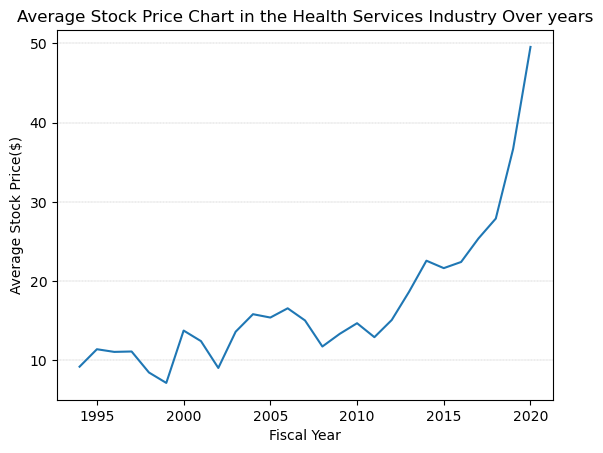

In [54]:
average_stock_price_per_year.plot(y='prcc_c', kind='line')
plt.title('Average Stock Price Chart in the Health Services Industry Over years')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Stock Price($)')
plt.grid(axis = 'y', color='grey',linestyle = '--', linewidth = 0.2)
plt.savefig('Average Stock Price in Health Services')
plt.show()

5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [55]:
#filter companies for 2007 and 2008
financial_crisis = firms_in_health[(firms_in_health['fyear']==2007) | (firms_in_health['fyear']==2008)]
financial_crisis.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_str,industry_code
2076,1559,2007,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,2.06,6.340,0.951,63.044,22.622,0.015085,8090,80
2077,1559,2008,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.05,10.286,0.477,62.196,19.099,0.007669,8090,80
3456,1884,2007,USA,DIALYSIS CORP OF AMERICA,NaN,8090,8.50,2.448,3.086,54.846,74.535,0.056267,8090,80
3457,1884,2008,USA,DIALYSIS CORP OF AMERICA,NaN,8090,7.00,6.543,2.844,71.079,86.837,0.040012,8090,80
6439,2589,2007,USA,HEALTHTRONICS INC,NaN,8093,4.59,25.198,-14.632,336.056,140.418,-0.043540,8093,80


In [56]:
#code source: https://www.tutorialspoint.com/python-pandas-find-the-common-rows-between-two-dataframes-with-merge
#merge 2007 and 2008
firms_2007 = firms_in_health[firms_in_health['fyear']==2007][['gvkey','fyear','conm','prcc_c']]
firms_2008 = firms_in_health[firms_in_health['fyear']==2008][['gvkey','fyear','conm','prcc_c']]

In [57]:
firms_2007.shape

(114, 4)

In [58]:
firms_2008.shape

(107, 4)

In [59]:
merged_financial_crisis = firms_2007.merge(firms_2008, how = 'inner', on='gvkey')
merged_financial_crisis.drop_duplicates
merged_financial_crisis

,gvkey,fyear_x,conm_x,prcc_c_x,fyear_y,conm_y,prcc_c_y
0,1559,2007,AMERICAN SHARED HSPTL SERV,2.06,2008,AMERICAN SHARED HSPTL SERV,1.05
1,1884,2007,DIALYSIS CORP OF AMERICA,8.50,2008,DIALYSIS CORP OF AMERICA,7.00
2,2589,2007,HEALTHTRONICS INC,4.59,2008,HEALTHTRONICS INC,2.25
3,2960,2007,CHEMED CORP,55.88,2008,CHEMED CORP,39.77
4,4418,2007,ENZO BIOCHEM INC,12.74,2008,ENZO BIOCHEM INC,4.89
...,...,...,...,...,...,...,...
99,183283,2007,ADDUS HOMECARE CORP,NaN,2008,ADDUS HOMECARE CORP,NaN
100,183337,2007,GLOBAL CORD BLOOD CORP,NaN,2008,GLOBAL CORD BLOOD CORP,NaN
101,184058,2007,SMILE BRANDS GROUP INC-REDH,NaN,2008,SMILE BRANDS GROUP INC-REDH,NaN
102,184078,2007,RULES-BASED MEDICINE-REDH,NaN,2008,RULES-BASED MEDICINE-REDH,NaN


In [60]:
#calculate the percentage drop 
merged_financial_crisis['percent_drop'] = ((merged_financial_crisis['prcc_c_y'] - merged_financial_crisis['prcc_c_x'])/merged_financial_crisis['prcc_c_x'])*100

In [61]:
#find the largest drop 
merged_financial_crisis.sort_values("percent_drop").head(1)

,gvkey,fyear_x,conm_x,prcc_c_x,fyear_y,conm_y,prcc_c_y,percent_drop
81,149297,2007,INSIGHT HEALTH SVCS HLDG CP,3.0,2008,INSIGHT HEALTH SVCS HLDG CP,0.02,-99.333333


6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

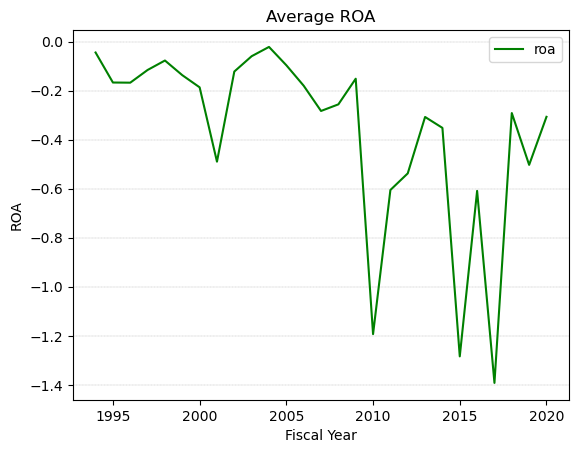

In [62]:
#filter location to USA only
filtered_location_df = firms_in_health[firms_in_health['location']=='USA']
#calculate roa for each fiscal year
average_roa = filtered_location_df.groupby('fyear')['roa'].mean()
#convert eries to dataframe
df_roa=pd.DataFrame(average_roa)
#plot the line chart
df_roa.plot(y='roa', kind='line',color='green')
plt.title('Average ROA')
plt.xlabel('Fiscal Year')
plt.ylabel('ROA')
plt.grid(axis = 'y',color = 'grey',linestyle = '--', linewidth = 0.2)
plt.savefig('Average ROA in Health Services')
plt.show()

## Part 2. Text Analysis on the Industry Sector


### C. [Text Cleaning; 10 points] The file "data/2020_10K_item1_full.csv" contains a sample of 5,988 firms and their “item 1” content in their 10-K reports in the year 2020. Load the dataset as a DataFrame and create a new column containing the cleaned text for each “item1” content. Follow the steps below to clean the text:

1. Convert all words to lowercase.
2. Remove punctuations.
3. Remove stop words based on the list of English stop words in NLTK.

In [63]:
#import packages and download stopwords in english
import nltk
import string
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xingewu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

In [65]:
def clean_text(text):
    # convert all words to lowercase
    clean_text = text.lower()

    # remove punctuations in clean_text
    clean_text = clean_text.translate(translator)

    # remove stopwords 
    clean_words = [w for w in clean_text.split() if w not in sw]
    
    return ' '.join(clean_words)

In [66]:
df_report['clean_text'] = df_report['item_1_text'].apply(clean_text)

In [67]:
df_report.head()

,cik,year,name,item_1_text,gvkey,clean_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


### D. [Keyword Analysis; 20 points] Conduct keywords analysis on your selected industry sector(s). Follow the steps below to complete the analysis:

1. Create a new DataFrame that includes only firms in your selected industry sectors. Ensure that you merge the 10-K data with the previous "public_firm.csv" data using an inner join.

In [68]:
#code source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
df_health_report = health_firms_2020.merge(df_report, how = 'inner', on='gvkey')

In [69]:
df_health_report.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_str,industry_code,cik,year,name,item_1_text,clean_text
0,2960,2020,USA,CHEMED CORP,NaN,8082,532.61,162.675,319.466,1434.911,2079.583,0.222638,8082,80,19584,2020,CHEMED CORP,General Chemed Corporation (the Company or Che...,general chemed corporation company chemed inco...
1,30612,2020,USA,AMEDISYS INC,NaN,8082,293.33,81.808,183.608,1567.198,2071.519,0.117157,8082,80,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",overview amedisys inc leading healthcare servi...
2,162404,2020,USA,LHC GROUP INC,2005/06/09,8082,213.32,286.569,111.596,2483.354,2063.204,0.044938,8082,80,1303313,2020,"LHC Group, Inc","Overview We provide quality, cost-effective po...",overview provide quality costeffective postacu...
3,14960,2020,USA,LABORATORY CP OF AMER HLDGS,NaN,8071,203.55,1320.800,1556.100,20071.700,13995.500,0.077527,8071,80,920148,2020,LABORATORY CORP OF AMERICA HOLDINGS,Laboratory Corporation of America® Holdings (L...,laboratory corporation america® holdings labco...
4,24249,2020,USA,TELADOC HEALTH INC,2015/07/01,8090,199.96,733.324,-485.136,17755.281,1093.962,-0.027323,8090,80,1477449,2020,"Teladoc Health, Inc.",Overview Insulet Corporation ( we or the Com...,overview insulet corporation company primarily...


2. Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
#using the TF-IDF Score Method to find the top 10 keywords
def get_keywords_tfidf(document_list):

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

In [72]:
keywords = get_keywords_tfidf(df_health_report['clean_text'].tolist())

Processing the 0/10 document.


In [73]:
df_health_report['keyword_clean_tfidf'] =  keywords

In [74]:
df_health_report.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_str,industry_code,cik,year,name,item_1_text,clean_text,keyword_clean_tfidf
0,2960,2020,USA,CHEMED CORP,NaN,8082,532.61,162.675,319.466,1434.911,2079.583,0.222638,8082,80,19584,2020,CHEMED CORP,General Chemed Corporation (the Company or Che...,general chemed corporation company chemed inco...,vitas hospice care medicare services rotoroote...
1,30612,2020,USA,AMEDISYS INC,NaN,8082,293.33,81.808,183.608,1567.198,2071.519,0.117157,8082,80,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",overview amedisys inc leading healthcare servi...,care health hospice home medicare payment serv...
2,162404,2020,USA,LHC GROUP INC,2005/06/09,8082,213.32,286.569,111.596,2483.354,2063.204,0.044938,8082,80,1303313,2020,"LHC Group, Inc","Overview We provide quality, cost-effective po...",overview provide quality costeffective postacu...,care services health home medicare hospice lta...
3,14960,2020,USA,LABORATORY CP OF AMER HLDGS,NaN,8071,203.55,1320.800,1556.100,20071.700,13995.500,0.077527,8071,80,920148,2020,LABORATORY CORP OF AMERICA HOLDINGS,Laboratory Corporation of America® Holdings (L...,laboratory corporation america® holdings labco...,lcd company cdd testing laboratory laboratorie...
4,24249,2020,USA,TELADOC HEALTH INC,2015/07/01,8090,199.96,733.324,-485.136,17755.281,1093.962,-0.027323,8090,80,1477449,2020,"Teladoc Health, Inc.",Overview Insulet Corporation ( we or the Com...,overview insulet corporation company primarily...,omnipod insulin diabetes system fda pump devic...


In [75]:
df_health_report['keyword_clean_tfidf'][0]

'vitas hospice care medicare services rotorooter programs state laws may'

In [76]:
# Word count method 
from collections import Counter

In [77]:
def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

In [78]:
df_health_report['keyword_clean_wc'] = df_health_report['clean_text'].apply(get_keywords_wc)

In [79]:
df_health_report.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,...,roa,sic_str,industry_code,cik,year,name,item_1_text,clean_text,keyword_clean_tfidf,keyword_clean_wc
0,2960,2020,USA,CHEMED CORP,NaN,8082,532.61,162.675,319.466,1434.911,...,0.222638,8082,80,19584,2020,CHEMED CORP,General Chemed Corporation (the Company or Che...,general chemed corporation company chemed inco...,vitas hospice care medicare services rotoroote...,hospice care vitas medicare services programs ...
1,30612,2020,USA,AMEDISYS INC,NaN,8082,293.33,81.808,183.608,1567.198,...,0.117157,8082,80,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",overview amedisys inc leading healthcare servi...,care health hospice home medicare payment serv...,care health home medicare payment services hos...
2,162404,2020,USA,LHC GROUP INC,2005/06/09,8082,213.32,286.569,111.596,2483.354,...,0.044938,8082,80,1303313,2020,"LHC Group, Inc","Overview We provide quality, cost-effective po...",overview provide quality costeffective postacu...,care services health home medicare hospice lta...,care services health home medicare patients pa...
3,14960,2020,USA,LABORATORY CP OF AMER HLDGS,NaN,8071,203.55,1320.800,1556.100,20071.700,...,0.077527,8071,80,920148,2020,LABORATORY CORP OF AMERICA HOLDINGS,Laboratory Corporation of America® Holdings (L...,laboratory corporation america® holdings labco...,lcd company cdd testing laboratory laboratorie...,company testing lcd laboratory clinical servic...
4,24249,2020,USA,TELADOC HEALTH INC,2015/07/01,8090,199.96,733.324,-485.136,17755.281,...,-0.027323,8090,80,1477449,2020,"Teladoc Health, Inc.",Overview Insulet Corporation ( we or the Com...,overview insulet corporation company primarily...,omnipod insulin diabetes system fda pump devic...,omnipod system insulin diabetes device fda may...


In [80]:
df_health_report['keyword_clean_wc'][0]

'hospice care vitas medicare services programs state laws may medicaid'

3. Create two wordclouds to visualize the keywords across all firms in the selected sector: one based on the word count of keywords and another based on the TF-IDF score.

In [81]:
from wordcloud import WordCloud

In [82]:
#visualization based on word count 
text1 = ' '.join(df_health_report['keyword_clean_wc'].tolist())

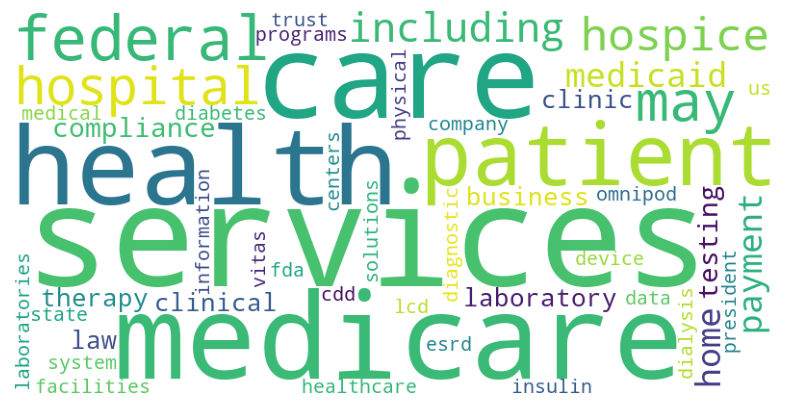

In [83]:
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1) 
plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') 
plt.axis('off')

plt.show()

In [84]:
# visualization based on TFIDF
text2 = ' '.join(df_health_report['keyword_clean_tfidf'].tolist())

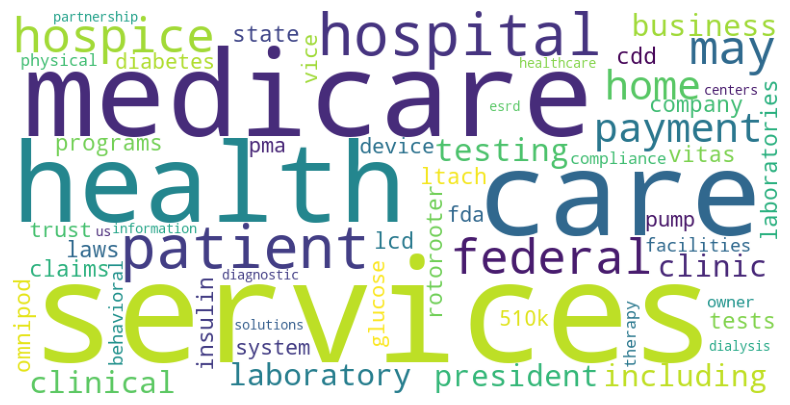

In [85]:
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2) 

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('keyword_tfidf.png') 
plt.axis('off')

plt.show()

### E. [Word embedding; 20 points] Train a word2vec model and analyze word similarities.

1. Train a word2vec model with the full 10-K sample (e.g., "data/2020_10K_item1_full.csv"). Please use the cleaned text (e.g., results from Step C) for training.

In [86]:
#step 1: import word2vec package
from gensim.models import Word2Vec

In [87]:
#house keeping: data cleaning and drop duplicates 
df_clean_report=df_report.drop_duplicates()

In [88]:
#step 2: split the text in each row and store individual words in a list. 
sent = [row.split() for row in df_clean_report['clean_text']]

In [89]:
#step 3: training word2vec model using the list of words in `sent`
model = Word2Vec(sent, min_count=1, vector_size=50, workers=3, window=3, sg = 1)

In [90]:
#step 4: save and load models 
model.save("word2vec.model")

In [91]:
model = Word2Vec.load("word2vec.model")

2. Manually inspect the wordclouds you generated in D.3 and choose three representative keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec model to find the most relevant five words for each of these three keywords.

In [92]:
#keyword 1: hospice 
model.wv.most_similar('hospice')[:5]

[('nursing', 0.8889029026031494),
 ('medicarecertified', 0.8663742542266846),
 ('hospices', 0.8623597025871277),
 ('snfs', 0.8575599789619446),
 ('hcbs', 0.8546373248100281)]

In [93]:
#keyword 2: health 
model.wv.most_similar('health')[:5]

[('commonspirit', 0.8352538347244263),
 ('retiree', 0.8308592438697815),
 ('•health', 0.8300438523292542),
 ('carerelated', 0.8255011439323425),
 ('healthrelated', 0.8207920789718628)]

In [94]:
#keyword 3: medicare
model.wv.most_similar('medicare')[:5]

[('medicaid', 0.9578234553337097),
 ('beneficiaries', 0.8899964094161987),
 ('cms', 0.8557045459747314),
 ('outofnetwork', 0.8528006076812744),
 ('payer', 0.8474509716033936)]

## Part 3. Comprehensive Analysis of One Sample Firm

### F. [Firm Analysis and Strategy Suggestion; 10 points] This is an open question. Pick one firm that you are interested in and try to analyze its market status. The ultimate goal is to provide one valuable suggestion to the firm based on your analysis. Some directions you might consider are, but not limited to:

1. Convert the keywords extracted in D.2 into word embeddings with the word2vec model trained in E.1. Add up the embeddings for each firm to create the firm-level embeddings. Use the firm-level embeddings to find the focal firm’s competing firms (or, most similar firms). 

In [95]:
#load the wrapper 
from DocumentSimilarity import DocumentSimilarity

In [96]:
d = DocumentSimilarity(model = model, gvkeys=df_health_report['gvkey'], conm = df_health_report['conm'], 
                       keywordslist = df_health_report['keyword_clean_tfidf'])

In [97]:
df_health_report

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,...,roa,sic_str,industry_code,cik,year,name,item_1_text,clean_text,keyword_clean_tfidf,keyword_clean_wc
0,2960,2020,USA,CHEMED CORP,NaN,8082,532.61,162.675,319.466,1434.911,...,0.222638,8082,80,19584,2020,CHEMED CORP,General Chemed Corporation (the Company or Che...,general chemed corporation company chemed inco...,vitas hospice care medicare services rotoroote...,hospice care vitas medicare services programs ...
1,30612,2020,USA,AMEDISYS INC,NaN,8082,293.33,81.808,183.608,1567.198,...,0.117157,8082,80,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",overview amedisys inc leading healthcare servi...,care health hospice home medicare payment serv...,care health home medicare payment services hos...
2,162404,2020,USA,LHC GROUP INC,2005/06/09,8082,213.32,286.569,111.596,2483.354,...,0.044938,8082,80,1303313,2020,"LHC Group, Inc","Overview We provide quality, cost-effective po...",overview provide quality costeffective postacu...,care services health home medicare hospice lta...,care services health home medicare patients pa...
3,14960,2020,USA,LABORATORY CP OF AMER HLDGS,NaN,8071,203.55,1320.800,1556.100,20071.700,...,0.077527,8071,80,920148,2020,LABORATORY CORP OF AMERICA HOLDINGS,Laboratory Corporation of America® Holdings (L...,laboratory corporation america® holdings labco...,lcd company cdd testing laboratory laboratorie...,company testing lcd laboratory clinical servic...
4,24249,2020,USA,TELADOC HEALTH INC,2015/07/01,8090,199.96,733.324,-485.136,17755.281,...,-0.027323,8090,80,1477449,2020,"Teladoc Health, Inc.",Overview Insulet Corporation ( we or the Com...,overview insulet corporation company primarily...,omnipod insulin diabetes system fda pump devic...,omnipod system insulin diabetes device fda may...
5,22260,2020,USA,HCA HEALTHCARE INC,NaN,8062,164.46,1793.000,3754.000,47490.000,...,0.079048,8062,80,860730,2020,"HCA Healthcare, Inc.","General HCA Healthcare, Inc. is one of the lea...",general hca healthcare inc one leading health ...,care president health services hospitals medic...,care health services hospitals medicare may ho...
6,11032,2020,USA,UNIVERSAL HEALTH SVCS INC,NaN,8062,137.50,1224.490,943.953,13476.879,...,0.070042,8062,80,352915,2020,UNIVERSAL HEALTH SERVICES INC,Our principal business is owning and operating...,principal business owning operating subsidiari...,care trust health hospitals facilities hospita...,care health hospitals services facilities hosp...
7,25318,2020,USA,U S PHYSICAL THERAPY INC,1992/05/28,8000,120.25,32.918,35.194,594.361,...,0.059213,8000,80,885978,2020,U S PHYSICAL THERAPY INC /NV,"Our company, U.S. Physical Therapy, Inc. ( we ...",company us physical therapy inc us company sub...,clinic compliance services clinics therapy med...,compliance clinic services therapy clinics med...
8,64166,2020,USA,QUEST DIAGNOSTICS INC,1996/12/17,8071,119.17,1158.000,1431.000,14026.000,...,0.102025,8071,80,1022079,2020,QUEST DIAGNOSTICS INC,INTRODUCTION Quest Diagnostics Incorporated is...,introduction quest diagnostics incorporated wo...,services testing diagnostic healthcare health ...,services healthcare health information testing...
9,61483,2020,USA,DAVITA INC,1995/10/31,8090,117.40,324.958,773.642,16988.516,...,0.045539,8090,80,927066,2020,DAVITA INC.,Unless otherwise indicated in this Annual Repo...,unless otherwise indicated annual report form ...,dialysis esrd services patients medicare us ce...,dialysis services patients medicare us centers...


In [98]:
#choose a focal firm: Chemed Corp 
df_health_report[df_health_report.gvkey == 2960]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,...,roa,sic_str,industry_code,cik,year,name,item_1_text,clean_text,keyword_clean_tfidf,keyword_clean_wc
0,2960,2020,USA,CHEMED CORP,NaN,8082,532.61,162.675,319.466,1434.911,...,0.222638,8082,80,19584,2020,CHEMED CORP,General Chemed Corporation (the Company or Che...,general chemed corporation company chemed inco...,vitas hospice care medicare services rotoroote...,hospice care vitas medicare services programs ...


In [99]:
#get the firm embedding
d.get_firm_embedding(firm = 2960)

array([-0.06223372, -0.00370023,  0.06651503, -0.10900237, -0.09404951,
       -0.06042739,  0.17143418,  0.23125389,  0.05344519, -0.18643507,
        0.12488934,  0.0016517 ,  0.06837323,  0.16723801, -0.09451377,
       -0.04791475,  0.10565867,  0.20110802, -0.18102804, -0.23274751,
        0.02090185,  0.09612217,  0.08224486, -0.11062364,  0.01585308,
        0.15088622, -0.03023706, -0.04075938, -0.16167936,  0.06116475,
       -0.0141792 , -0.03991726, -0.08016698,  0.03708681,  0.01272379,
        0.09592062,  0.00492797,  0.06436306,  0.0738638 , -0.09363905,
        0.13790657,  0.05560663,  0.00793529, -0.0811532 ,  0.32032332,
       -0.10111384, -0.08145125, -0.10360447,  0.13540606, -0.08163952],
      dtype=float32)

In [100]:
#find five similar firms in the health services based on the firm embedding
d.most_similar(firm = 2960, topn = 5)

[(30612, 'AMEDISYS INC', 0.9423256),
 (61483, 'DAVITA INC', 0.9421334),
 (22260, 'HCA HEALTHCARE INC', 0.9387005),
 (11032, 'UNIVERSAL HEALTH SVCS INC', 0.9278591),
 (25318, 'U S PHYSICAL THERAPY INC', 0.9155438)]

2. Compare the revenue, market share, and ROA of the focal firm to its competitors and provide suggestions accordingly.

In [101]:
df_health_report[]

SyntaxError: invalid syntax (2125602252.py, line 1)

In [ ]:
#chemed datasets
chemed=df_firm[df_firm['gvkey']==2960]
#AMEDISYS datasets 
amedisys = df_firm[df_firm['gvkey']==30612]
#DAVITA datasets 
davita = df_firm[df_firm['gvkey']==61483]
#HCA datasets 
hca = df_firm[df_firm['gvkey']==22260]
#universal datasets 
universal = df_firm[df_firm['gvkey']==11032]
#usp datasets 
usp = df_firm[df_firm['gvkey']==25318]

In [ ]:
#Revenue
# creating the dataset
companies = df_health_report['conm']
revenue = df_health_report['sale']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(companies, revenue)

plt.xticks(fontsize=8,rotation=90)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
plt.xlabel("Companies")
plt.ylabel("Revenue")
plt.title("Revenue Per Company Earned in 2020")
plt.show()

In [ ]:
# Creating dataset
import numpy as np
#Market Share 
industry_revenue = df_health_report['sale'].sum()

# creating the dataset
companies = df_health_report['conm']
market_share = df_health_report['sale']/industry_revenue


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.1,0.1,0.1,0.1,0.1)

# Creating color parameters
colors = ("#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "grey" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%".format(pct)

# Creating plot
fig, ax = plt.subplots(figsize =(9, 9))
wedges, texts, autotexts = ax.pie(market_share,
								autopct = lambda pct: func(pct, market_share),
								explode = explode,
								labels = companies,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, companies,
		title ="Companies",
		loc ="center left",
		bbox_to_anchor =(1, 0.5, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Market Share Per Company in 2020", x=0.5, y=1.1, fontsize=15)

# show plot
plt.show()


Reference: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

In [ ]:
#ROA
# creating the dataset
companies = df_health_report['conm']
roa = df_health_report['roa']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(companies, roa, color='green')

plt.xticks(fontsize=8,rotation=90)
plt.ylim(-0.05, 0.25)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.2)
plt.xlabel("Companies")
plt.ylabel("ROA")
plt.title("ROA Per Company in 2020")
plt.show()

Reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/


3. Perform an analysis of the historical stock prices, ROA, revenue, and assets of the chosen company. Investigate potential correlations and address noteworthy decreases and increases.

In [ ]:
chemed

In [ ]:
#stock price graph
x1=chemed['fyear']
y1=chemed['prcc_c']
plt.plot(x1, y1)
plt.xlabel("Fiscal Year")
plt.ylabel("Stock Price")
plt.title("CHEMED Stock Price Over Years")
plt.show()

#ROA line graph 
x2 = chemed['fyear']
y2 = chemed['roa']
plt.plot(x2,y2,color='green')
plt.xlabel("Fiscal Year")
plt.ylabel("ROA")
plt.title("CHEMED ROA Over Years")
plt.show()

#Revenue graph 
x3=chemed['fyear']
y3=chemed['sale']
plt.plot(x3, y3, color='red')
plt.xlabel("Fiscal Year")
plt.ylabel("Revenue")
plt.title("CHEMED Revenue Over Years")
plt.show()

#asset graph 
x4=chemed['fyear']
y4=chemed['asset']
plt.plot(x4, y4, color='orange')
plt.xlabel("Fiscal Year")
plt.ylabel("Asset")
plt.title("CHEMED Asset Over Years")
plt.show()